# Simulate shifted data sources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
from scipy.stats import spearmanr
from typing import List
from functools import reduce


### Create data - utility functions

In [2]:
def fake_hits(number_of_pulses: int) -> np.array:
    return np.array([randint(0,9) for i in range(number_of_pulses)])
    
def hits_series(number_of_trains: int, number_of_pulses:int) -> pd.Series:     
    train_id = pd.Series([id for id in range(number_of_trains)], name="Train ID")
    return pd.Series([fake_hits(number_of_pulses) for id in range(number_of_trains)], index=train_id)

def simulate_drift(length: int, n_shifts:int) -> List:
    shift_pos = [int(length/(n_shifts+1))*i for i in range(1,n_shifts+1)]
    drift = np.zeros(length)
    return [drift := drift + np.concatenate([np.zeros(i),np.ones(length-i)]) for i in shift_pos][-1]

def merged_data_frame(raw: pd.Series, offset=0) -> pd.DataFrame:
    flash = raw.copy()
    flash.name = 'FLASH'
    external = raw.copy()
    external.name = 'External'
    external.index += offset
    return pd.concat([flash, external], axis = 1)



### Analyse - utility functions

In [3]:
def accumulated_trace(data_frame):
    df = data_frame.dropna()
    x, y = df['FLASH'].apply(np.sum), df['External'].apply(np.sum)
    corr, _ = spearmanr(x, y) 
    return x, y, corr
   
    

## Demo

create raw data

In [4]:
number_of_trains = 1000
number_of_pulses = 300

raw = hits_series(number_of_trains, number_of_pulses)
raw

Train ID
0      [0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ...
1      [2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ...
2      [3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ...
3      [4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ...
4      [3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ...
                             ...                        
995    [5, 6, 5, 4, 5, 5, 0, 9, 0, 8, 1, 1, 8, 8, 7, ...
996    [5, 3, 9, 8, 2, 1, 1, 7, 2, 3, 9, 7, 2, 9, 3, ...
997    [2, 6, 9, 8, 1, 5, 4, 6, 1, 9, 2, 0, 8, 9, 0, ...
998    [3, 1, 2, 6, 7, 7, 8, 7, 4, 2, 5, 4, 5, 2, 9, ...
999    [1, 8, 5, 7, 1, 3, 9, 0, 0, 8, 5, 4, 2, 6, 0, ...
Length: 1000, dtype: object

* merge raw data from "different sources"

,FLASH,External
Train ID,,
0,"[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ...","[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ..."
1,"[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ...","[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ..."
2,"[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ...","[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ..."
3,"[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ...","[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ..."
4,"[3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ...","[3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ..."
...,...,...
995,"[5, 6, 5, 4, 5, 5, 0, 9, 0, 8, 1, 1, 8, 8, 7, ...","[5, 6, 5, 4, 5, 5, 0, 9, 0, 8, 1, 1, 8, 8, 7, ..."
996,"[5, 3, 9, 8, 2, 1, 1, 7, 2, 3, 9, 7, 2, 9, 3, ...","[5, 3, 9, 8, 2, 1, 1, 7, 2, 3, 9, 7, 2, 9, 3, ..."
997,"[2, 6, 9, 8, 1, 5, 4, 6, 1, 9, 2, 0, 8, 9, 0, ...","[2, 6, 9, 8, 1, 5, 4, 6, 1, 9, 2, 0, 8, 9, 0, ..."


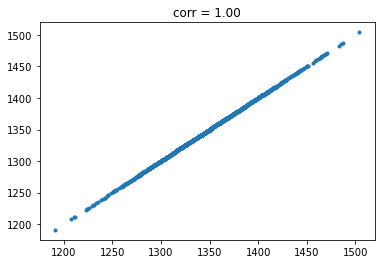

In [5]:
df = merged_data_frame(raw)

x, y, corr  =  accumulated_trace(df)

plt.plot(x,y,'.')
plt.title(f'corr = {corr:1.2f}')
df

* merge raw data with one source is shifted

,FLASH,External
Train ID,,
0,"[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ...",NaN
1,"[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ...","[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ..."
2,"[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ...","[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ..."
3,"[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ...","[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ..."
4,"[3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ...","[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ..."
...,...,...
996,"[5, 3, 9, 8, 2, 1, 1, 7, 2, 3, 9, 7, 2, 9, 3, ...","[5, 6, 5, 4, 5, 5, 0, 9, 0, 8, 1, 1, 8, 8, 7, ..."
997,"[2, 6, 9, 8, 1, 5, 4, 6, 1, 9, 2, 0, 8, 9, 0, ...","[5, 3, 9, 8, 2, 1, 1, 7, 2, 3, 9, 7, 2, 9, 3, ..."
998,"[3, 1, 2, 6, 7, 7, 8, 7, 4, 2, 5, 4, 5, 2, 9, ...","[2, 6, 9, 8, 1, 5, 4, 6, 1, 9, 2, 0, 8, 9, 0, ..."


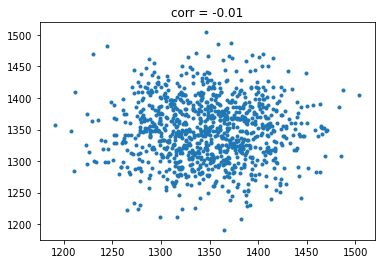

In [6]:
shift = 1
df = merged_data_frame(raw, offset=shift)

x, y, corr  =  accumulated_trace(df)

plt.plot(x,y,'.')
plt.title(f'corr = {corr:1.2f}')
df

* merge raw data with one source is drifting away

,FLASH,External
Train ID,,
0.0,"[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ...","[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ..."
1.0,"[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ...","[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ..."
2.0,"[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ...","[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ..."
3.0,"[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ...","[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ..."
4.0,"[3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ...","[3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ..."
...,...,...
998.0,"[3, 1, 2, 6, 7, 7, 8, 7, 4, 2, 5, 4, 5, 2, 9, ...","[5, 6, 5, 4, 5, 5, 0, 9, 0, 8, 1, 1, 8, 8, 7, ..."
999.0,"[1, 8, 5, 7, 1, 3, 9, 0, 0, 8, 5, 4, 2, 6, 0, ...","[5, 3, 9, 8, 2, 1, 1, 7, 2, 3, 9, 7, 2, 9, 3, ..."
1000.0,NaN,"[2, 6, 9, 8, 1, 5, 4, 6, 1, 9, 2, 0, 8, 9, 0, ..."


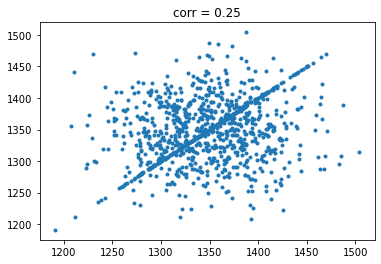

In [7]:
n_shifts = 3
drift = simulate_drift(number_of_trains, n_shifts)

df = merged_data_frame(raw, offset=drift)

x, y, corr  =  accumulated_trace(df)

plt.plot(x, y,'.')
plt.title(f'corr = {corr:1.2f}')
df

### Split in induvidual pulses

In [8]:
df

,FLASH,External
Train ID,,
0.0,"[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ...","[0, 7, 1, 6, 3, 1, 2, 9, 5, 6, 5, 2, 7, 2, 7, ..."
1.0,"[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ...","[2, 6, 1, 5, 5, 9, 3, 7, 4, 5, 9, 1, 1, 2, 7, ..."
2.0,"[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ...","[3, 5, 0, 5, 2, 6, 3, 9, 4, 8, 9, 9, 7, 1, 5, ..."
3.0,"[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ...","[4, 1, 4, 6, 4, 8, 9, 9, 3, 1, 2, 7, 2, 9, 2, ..."
4.0,"[3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ...","[3, 2, 5, 6, 1, 3, 7, 8, 6, 8, 5, 3, 7, 9, 4, ..."
...,...,...
998.0,"[3, 1, 2, 6, 7, 7, 8, 7, 4, 2, 5, 4, 5, 2, 9, ...","[5, 6, 5, 4, 5, 5, 0, 9, 0, 8, 1, 1, 8, 8, 7, ..."
999.0,"[1, 8, 5, 7, 1, 3, 9, 0, 0, 8, 5, 4, 2, 6, 0, ...","[5, 3, 9, 8, 2, 1, 1, 7, 2, 3, 9, 7, 2, 9, 3, ..."
1000.0,NaN,"[2, 6, 9, 8, 1, 5, 4, 6, 1, 9, 2, 0, 8, 9, 0, ..."


<span style="color:red">
    * Do we really want to drop the NaN rows ?
</span>


In [9]:
def expand_arrays_to_columns(df, column_list):
    df = df.dropna()   # FIXME 
    dfs = [pd.DataFrame(df[column].tolist(), columns=expanded_column_names(df[column]), index=df[column].index)
           for column in column_list]
    return reduce(pd.DataFrame.combine_first, dfs, pd.DataFrame())

def expanded_column_names(series: pd.Series) -> List:
    return [f"{series.name}:{i}" for i in range(len(series.iloc[0]))]
    

    
expand_arrays_to_columns(df, ['FLASH', 'External'])

,External:0,External:1,External:10,External:100,External:101,External:102,External:103,External:104,External:105,External:106,...,FLASH:90,FLASH:91,FLASH:92,FLASH:93,FLASH:94,FLASH:95,FLASH:96,FLASH:97,FLASH:98,FLASH:99
Train ID,,,,,,,,,,,,,,,,,,,,,
0.0,0,7,5,8,3,5,5,6,2,3,...,7,2,7,7,5,1,3,6,0,3
1.0,2,6,9,3,2,7,4,3,4,7,...,8,2,3,7,2,2,5,5,9,3
2.0,3,5,9,2,5,4,8,3,6,7,...,4,3,8,1,1,7,6,3,9,4
3.0,4,1,2,6,9,8,7,5,2,3,...,6,5,4,1,7,5,4,8,6,0
4.0,3,2,5,2,0,1,1,1,1,1,...,8,4,1,7,6,5,1,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995.0,0,4,9,9,6,3,3,7,7,5,...,8,8,8,0,7,8,4,8,7,7
996.0,1,1,6,5,9,5,2,9,1,3,...,2,8,5,5,7,1,0,5,7,6
997.0,5,4,5,6,1,9,7,6,6,0,...,8,6,0,6,0,0,1,2,5,1
